In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
import tensorflow as tf

In [88]:
x_data = np.linspace(0.0,10.0,100000)

In [89]:
noise = np.random.randn(len(x_data))

In [90]:
noise

array([ 0.73316319,  1.47899282, -0.12819041, ..., -0.21289817,
        0.29428467, -1.10012809])

y = mx + b

b = 5


In [91]:
y_true = (0.5 * x_data) + 5 + noise

In [92]:
x_df = pd.DataFrame(data = x_data , columns=['X Data'])

In [93]:
y_df = pd.DataFrame(data=y_true,columns=["y"])


In [94]:
x_df.head()


,X Data
0,0.0000
1,0.0001
2,0.0002
3,0.0003
4,0.0004


In [95]:
y_df.head()

,y
0,5.733163
1,6.479043
2,4.871910
3,5.623219
4,5.210056


In [96]:
my_data = pd.concat([x_df,y_df],axis = 1)

In [97]:
my_data.head()

,X Data,y
0,0.0000,5.733163
1,0.0001,6.479043
2,0.0002,4.871910
3,0.0003,5.623219
4,0.0004,5.210056


In [98]:
temp=my_data.sample(n=250)



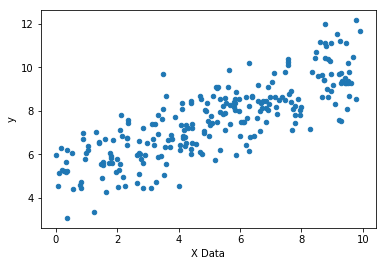

In [99]:
 temp.plot(x='X Data',y='y',kind='scatter')

## batch training

In [104]:
batch_size = 8

In [105]:
np.random.randn(2)

array([-1.37164692, -0.81481288])

In [107]:
m = tf.Variable(1.15)

In [108]:
b = tf.Variable(-.002)

In [109]:

xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [110]:
y_model = m*xph + b

In [111]:
error = tf.reduce_sum(tf.square(yph-y_model)) 

In [112]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train= optimizer.minimize(error)

In [113]:
init = tf.global_variables_initializer()


In [114]:
with tf.Session() as sess:
    sess.run(init)
    batches= 100000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        feed={xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
    model_m,model_b = sess.run([m,b])

In [115]:
model_m

0.45965603

In [116]:
model_b

5.0213633

In [117]:
y_hat = x_data*model_m + model_b

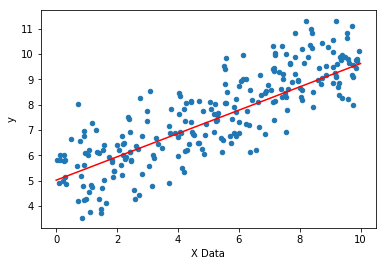

In [118]:
my_data.sample(250).plot(x='X Data',y='y',kind='scatter')
plt.plot(x_data,y_hat,'r')

#   TF ESTIMATOR


In [119]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [120]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpf4kd0o3c', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0dbcdc4e48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [121]:
from sklearn.model_selection import train_test_split

In [122]:
x_train,x_eval,y_train,y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [123]:
print(x_train.shape)

(70000,)


In [124]:
x_eval.shape

(30000,)

In [125]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [126]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [127]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,num_epochs=1000,shuffle=False)

In [128]:
estimator.train(input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpf4kd0o3c/model.ckpt.
INFO:tensorflow:loss = 524.2153, step = 1
INFO:tensorflow:global_step/sec: 1091.64
INFO:tensorflow:loss = 15.295948, step = 101 (0.093 sec)
INFO:tensorflow:global_step/sec: 1480.1
INFO:tensorflow:loss = 5.952202, step = 201 (0.069 sec)
INFO:tensorflow:global_step/sec: 1359.91
INFO:tensorflow:loss = 10.289306, step = 301 (0.073 sec)
INFO:tensorflow:global_step/sec: 1335.42
INFO:tensorflow:loss = 15.158321, step = 401 (0.074 sec)
INFO:tensorflow:global_step/sec: 1393.26
INFO:tensorflow:loss = 22.497337, step = 501 (0.072 sec)
INFO:tensorflow:global_step/sec: 1418.67
INFO:tensorflow:loss = 29.668972, step = 601 (0.070 sec)
INFO:tensorflow:global_step/sec: 1320.78
INFO:tensorflow:los

In [129]:

train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-25-08:52:30
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpf4kd0o3c/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-05-25-08:52:31
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0863347, global_step = 1000, loss = 8.690678
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpf4kd0o3c/model.ckpt-1000


In [130]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-25-08:52:31
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpf4kd0o3c/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-05-25-08:52:32
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0747906, global_step = 1000, loss = 8.598325
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpf4kd0o3c/model.ckpt-1000


In [131]:
print("TRAINING DATA METRICS",train_metrics,sep='\n')

TRAINING DATA METRICS
{'average_loss': 1.0863347, 'loss': 8.690678, 'global_step': 1000}


In [132]:
print("Eval DATA METRICS",eval_metrics,sep='\n')

Eval DATA METRICS
{'average_loss': 1.0747906, 'loss': 8.598325, 'global_step': 1000}


In [133]:
#to predict new values
brand_new_data=np.linspace(0,10,10)

In [134]:

iniput_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [135]:
list(estimator.predict(iniput_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpf4kd0o3c/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.464798], dtype=float32)},
 {'predictions': array([5.107947], dtype=float32)},
 {'predictions': array([5.751096], dtype=float32)},
 {'predictions': array([6.394244], dtype=float32)},
 {'predictions': array([7.0373936], dtype=float32)},
 {'predictions': array([7.680542], dtype=float32)},
 {'predictions': array([8.32369], dtype=float32)},
 {'predictions': array([8.96684], dtype=float32)},
 {'predictions': array([9.609989], dtype=float32)},
 {'predictions': array([10.253138], dtype=float32)}]

In [136]:
predictions = []
for pred in estimator.predict(input_fn=iniput_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpf4kd0o3c/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [137]:
predictions


[array([4.464798], dtype=float32),
 array([5.107947], dtype=float32),
 array([5.751096], dtype=float32),
 array([6.394244], dtype=float32),
 array([7.0373936], dtype=float32),
 array([7.680542], dtype=float32),
 array([8.32369], dtype=float32),
 array([8.96684], dtype=float32),
 array([9.609989], dtype=float32),
 array([10.253138], dtype=float32)]

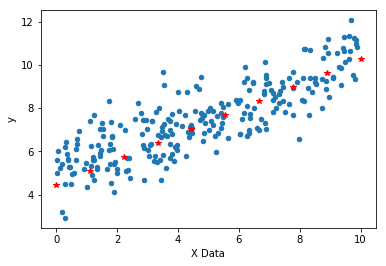

In [143]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='y')
plt.plot(brand_new_data,predictions,'r*')